In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("Walmart_sales_analysis.csv")
#print first few rows
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,"1,643,691",0,42,3,211,8
1,1,2/12/2010,"1,641,957",1,39,3,211,8
2,1,2/19/2010,"1,611,968",0,40,3,211,8
3,1,2/26/2010,"1,409,728",0,47,3,211,8
4,1,3/5/2010,"1,554,807",0,46,3,211,8


In [123]:
#print last few rows
df.tail()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,9/28/2012,"713,174",0,65,4,192,9
6431,45,10/5/2012,"733,455",0,65,4,192,9
6432,45,10/12/2012,"734,464",0,54,4,192,9
6433,45,10/19/2012,"718,126",0,56,4,192,9
6434,45,10/26/2012,"760,281",0,59,4,192,9


In [124]:
#check null values
df.isnull().sum()

Store_Number    0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
 CPI            0
Unemployment    0
dtype: int64

In [125]:
df.describe()

,Store_Number,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,0,61,3,172,8
std,13,0,18,0,39,2
min,1,0,-2,2,126,4
25%,12,0,47,3,132,7
50%,23,0,63,3,183,8
75%,34,0,75,4,213,9
max,45,1,100,4,227,14


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB


In [127]:
df.dtypes

Store_Number      int64
Date             object
Weekly_Sales     object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
 CPI              int64
Unemployment    float64
dtype: object

In [128]:
df["Weekly_Sales"] = (df["Weekly_Sales"].astype(str).str.replace(",", "", regex=True).astype(float))

In [129]:
# create month and year column for further analysis
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Month"] = df["Date"].dt.month_name()
df["Year"] = df["Date"].dt.year
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,"1,643,691",0,42,3,211,8,February,2010
1,1,2010-02-12,"1,641,957",1,39,3,211,8,February,2010
2,1,2010-02-19,"1,611,968",0,40,3,211,8,February,2010
3,1,2010-02-26,"1,409,728",0,47,3,211,8,February,2010
4,1,2010-03-05,"1,554,807",0,46,3,211,8,March,2010


In [130]:
#calculate total sales by year and month
total_sales = (
    df.groupby(["Year","Month"])["Weekly_Sales"]
      .sum().reset_index()
)
pd.options.display.float_format = '{:,.0f}'.format
total_sales

,Year,Month,Weekly_Sales
0,2010,April,"231,412,370"
1,2010,August,"187,640,109"
2,2010,December,"288,760,533"
3,2010,February,"190,332,986"
4,2010,July,"232,580,128"
5,2010,June,"192,246,177"
6,2010,March,"181,919,798"
7,2010,May,"186,710,937"
8,2010,November,"202,853,374"
9,2010,October,"217,161,819"


In [131]:
#calculating YoY_Growth %
total_yearly_sales = (
    df.groupby(["Year"])["Weekly_Sales"]
      .sum().reset_index()
)
pd.options.display.float_format = '{:,.0f}'.format
total_yearly_sales["YoY_Growth_%"] = total_yearly_sales["Weekly_Sales"].pct_change() * 100
total_yearly_sales

,Year,Weekly_Sales,YoY_Growth_%
0,2010,"2,288,886,130",NaN
1,2011,"2,448,200,019",7
2,2012,"2,000,132,859",-18


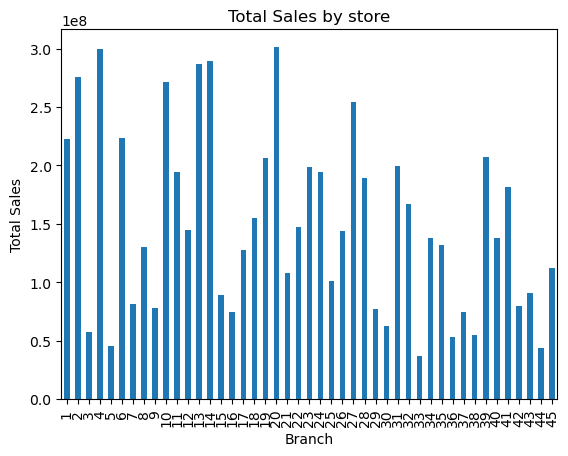

Store_Number
1    222,402,813
2    275,382,441
3     57,586,736
4    299,543,953
5     45,475,698
6    223,756,129
7     81,598,271
8    129,951,174
9     77,789,219
10   271,617,714
11   193,962,786
12   144,287,227
13   286,517,707
14   288,999,911
15    89,133,689
16    74,252,428
17   127,782,134
18   155,114,733
19   206,634,855
20   301,397,795
21   108,117,877
22   147,075,642
23   198,750,624
24   194,016,024
25   101,061,183
26   143,416,402
27   253,855,919
28   189,263,674
29    77,141,555
30    62,716,890
31   199,613,902
32   166,819,251
33    37,160,223
34   138,249,767
35   131,520,673
36    53,412,217
37    74,202,741
38    55,159,625
39   207,445,548
40   137,870,305
41   181,341,936
42    79,565,750
43    90,565,443
44    43,293,082
45   112,395,342
Name: Weekly_Sales, dtype: float64


In [143]:
#total sales by store
total_sales_by_store = (
    df.groupby(["Store_Number"])["Weekly_Sales"].sum()
)
total_sales_by_store.plot(kind="bar")
plt.plot(30,8)
#store_numbers = total_sales_by_store['Store_Number']
#plt.xticks(ticks=store_numbers)
plt.title("Total Sales by store")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.savefig("visualizations/total_sales_by_store.png")
plt.show()

print(total_sales_by_store)

In [133]:
#calculating quarterly sales for each year
month_to_quarter = {
    "January": "Q1", "February": "Q1", "March": "Q1",
    "April": "Q2", "May": "Q2", "June": "Q2",
    "July": "Q3", "August": "Q3", "September": "Q3",
    "October": "Q4", "November": "Q4", "December": "Q4"
}

df["Quarter"] = df["Month"].map(month_to_quarter)

# Aggregate sales by Year and Quarter
quarterly_sales = df.groupby(["Year", "Quarter"])["Weekly_Sales"].sum().reset_index()
print(quarterly_sales)

    Year Quarter  Weekly_Sales
0   2010      Q1   372,252,784
1   2010      Q2   610,369,484
2   2010      Q3   597,488,136
3   2010      Q4   708,775,726
4   2011      Q1   529,391,746
5   2011      Q2   597,948,054
6   2011      Q3   639,358,476
7   2011      Q4   681,501,743
8   2012      Q1   592,467,701
9   2012      Q2   618,297,711
10  2012      Q3   605,005,770
11  2012      Q4   184,361,677


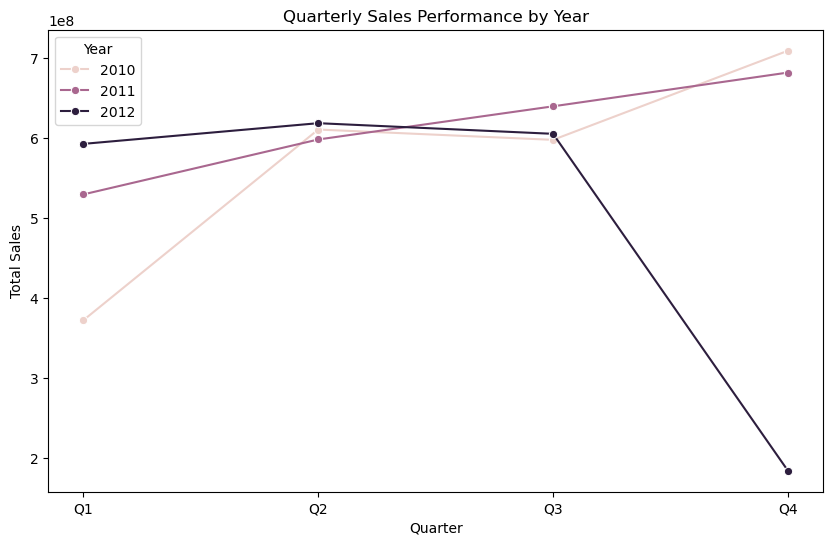

In [134]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=quarterly_sales, x="Quarter", y="Weekly_Sales", hue="Year", marker='o')
plt.title("Quarterly Sales Performance by Year")
plt.ylabel("Total Sales")
plt.savefig("visualizations/quaterly_sales_performance.png")
plt.show()

In [135]:
#analysing temperature effect on sales
# Ensure proper types
df['Temperature'] = df['Temperature'].astype(float)

In [136]:
# Flag extreme temperatures
df['Extreme_Temp'] = df['Temperature'].apply(lambda x: 'Low (<32F)' if x < 32 else ('High (>90F)' if x > 90 else 'Normal'))

# Average sales by temperature category
temp_sales = df.groupby('Extreme_Temp')['Weekly_Sales'].mean().reset_index()
print(temp_sales)

  Extreme_Temp  Weekly_Sales
0  High (>90F)       796,966
1   Low (<32F)     1,050,918
2       Normal     1,054,495


C:\Users\darsh\AppData\Local\Temp\ipykernel_21476\2996784020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_sales, x='Extreme_Temp', y='Weekly_Sales', palette='coolwarm')


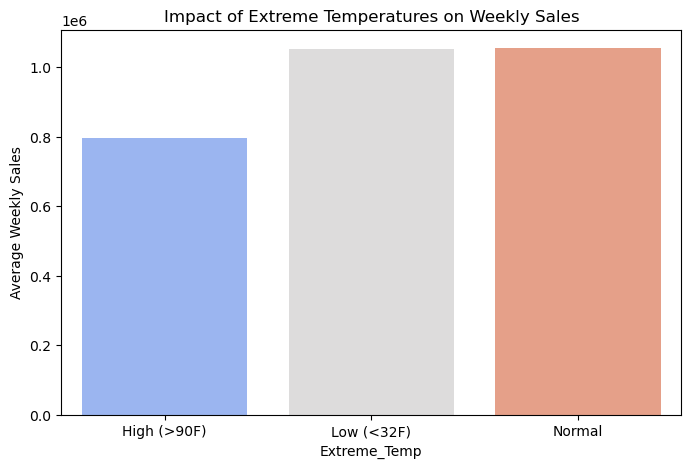

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=temp_sales, x='Extreme_Temp', y='Weekly_Sales', palette='coolwarm')
plt.title('Impact of Extreme Temperatures on Weekly Sales')
plt.ylabel('Average Weekly Sales')
plt.savefig("visualizations/impact_of_extreme_weather.png")
plt.show()